In [1]:
%load_ext autoreload
%autoreload 2

# Integrate specific regions

# Single file processing

## Subtract baseline

The baseline of the MSCV was already roughly adjusted in the pre-processing step of the data.  
For the following evalution this step needs to be done more prcisely.

In [2]:
from iokectools.workingfiles import WorkingFiles
from iokectools.baseline import Baseline
import matplotlib.pyplot as plt

Select a single file

In [3]:
#20190319_DEMS_CV_STMV-100-ML_Ru0001_E_H2SO4_DEMS_COox004_pn_c_118.csv
file = [ '20190328_DEMS_CV_STMV-330-ML_Ru0001_B_H2SO4_DEMS_COox001_pn_c_119.csv',
        # '20190319_DEMS_CV_STMV-100-ML_Ru0001_E_H2SO4_DEMS_COox004_pn_c_120.csv',
       ]

datafolder = r'..\data'
wf = WorkingFiles(datafolder,file)
df = wf.create_concat_df()
#wf.list_colnames()

The baseline is adjusted with the class `Baseline`. For the current dataset, by default we determine the baseline of mass 44 and determine the baseline for the firs 50 points.

In [4]:
Baseline?

Init signature: Baseline(df, mass=44, start=0, stop=50)
Docstring:      <no docstring>
File:           o:\meine ablage\projects_repos\project_7\scripts\iokectools\baseline.py
Type:           type
Subclasses:     

In [5]:
baseline = Baseline(df)

In [6]:
baseline.df.head(2)

,time,ion_current_M2,ion_current_M44,potential,current1_mA,coll_current,current1,current1_muA,ion_current_M44_sBG_sub,ion_current_M44_sBG_ALS,...,ion_current_M44_UVS_sub,ion_current_M44_UVS_ALS,ion_current_M44_UVS_ALS_sub,ion_current_M44_MF,ion_current_M44_MF_sub,current1_muA_geo,ion_current_M44_UVS_ALS_sub_norm,ion_current_M44_norm,ion_current_M44_UVS_ALS_sub_norm_filt,ion_current_M44_UVS_ALS_sub_filt
0,2785.70,3.157590e-09,2.378316e-10,0.031791,-0.000621,NaN,-6.208182e-07,-0.620818,-3.950798e-12,-2.165750e-12,...,-1.474707e-11,-1.407399e-11,-6.730755e-13,2.437517e-10,-5.920132e-12,-1.613164,-2.418707e-12,-2.466277e-12,-8.234260e-13,0.0
1,2785.75,3.157679e-09,2.372777e-10,0.029894,-0.000613,NaN,-6.130000e-07,-0.613000,-4.504699e-12,-2.165165e-12,...,-1.530066e-11,-1.407178e-11,-1.228884e-12,2.437517e-10,-6.474033e-12,-1.592849,-2.974516e-12,-3.020179e-12,-8.234260e-13,0.0


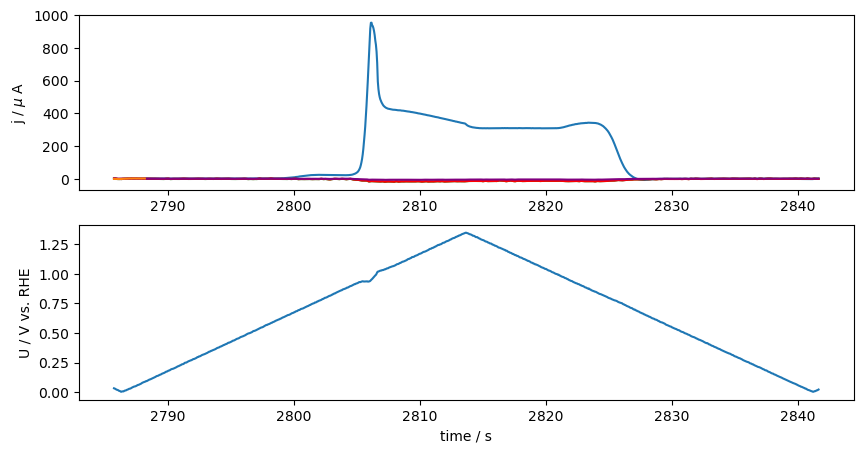

In [7]:
baseline.plot()

## Adjust timeshift

During the masurement the timeshift and the K-factor could change.
In a certain timeframe the timeshift should, however, be rather similar.

We first guess some values.

In [8]:
from iokectools.timeshift import Timeshift
K_prefactor=0.86
K_power = 1E-7
K = K_prefactor * K_power
timeshift = Timeshift(baseline.df, K_prefactor=K_prefactor, K_power=K_power, interval=-0.5)

In [9]:
timeshift.df.head()

,potential,current1_muA_geo,ion_current_M44_UVS_ALS_sub_norm_filt,time,sim_current,current_H_sub
0,0.006577,-2.264777,-8.234260e-13,2786.20,-9.574721,7.309945
1,0.002527,-2.398289,-8.234260e-13,2786.25,-9.574721,7.176433
2,0.003049,-2.839238,-8.234260e-13,2786.30,-9.574721,6.735484
3,0.005334,-1.809040,-8.234260e-13,2786.35,-9.574721,7.765682
4,0.005862,-0.869490,-8.234260e-13,2786.40,-9.574721,8.705231


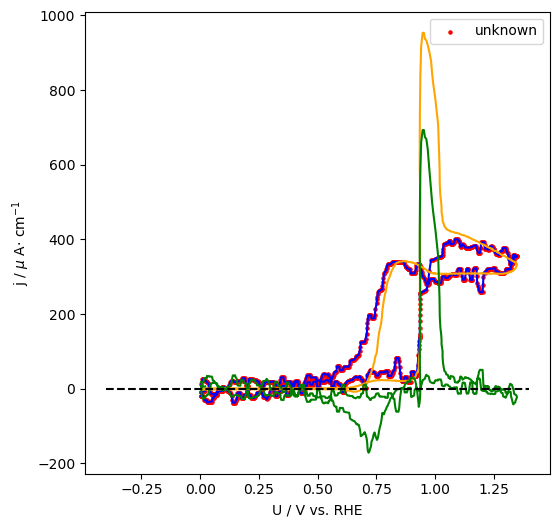

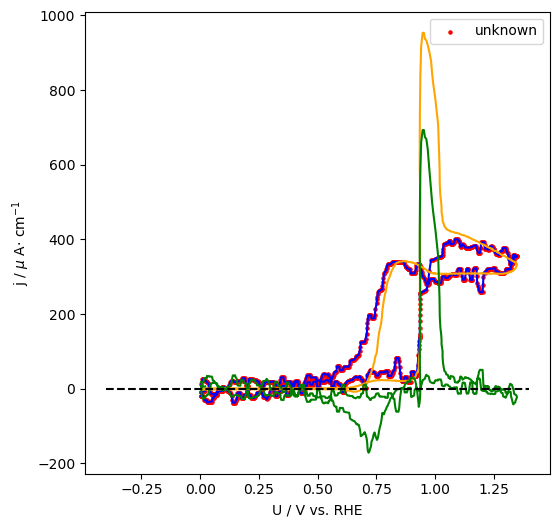

In [10]:
timeshift.plot()

In [11]:
gui = timeshift.interactive()
gui

Output()

### The dataframe created with the K and interval values provided to `Timeshift`.

In [12]:
timeshift.df.head(2)

,potential,current1_muA_geo,ion_current_M44_UVS_ALS_sub_norm_filt,time,sim_current,current_H_sub
0,0.006577,-2.264777,-8.234260e-13,2786.20,-9.574721,7.309945
1,0.002527,-2.398289,-8.234260e-13,2786.25,-9.574721,7.176433


### The dataframe created with the K and interval values from the interactive adjustment of the `Timeshift`.

In [13]:
timeshift.ts.df.head(2)

,potential,current1_muA_geo,ion_current_M44_UVS_ALS_sub_norm_filt,time,sim_current,current_H_sub
0,0.006577,-2.264777,-8.234260e-13,2786.20,-9.574721,7.309945
1,0.002527,-2.398289,-8.234260e-13,2786.25,-9.574721,7.176433


The new values can be extracted from the interactive timeshift object.

In [14]:
# new timeshift
timeshift.ts.interval

-0.5

In [15]:
# New K factors

In [16]:
timeshift.ts.K

8.599999999999999e-08

## Integrate the CO-MS-CV

In [17]:
from iokectools.integrate import COIntegral
charges = COIntegral(timeshift.ts.df, K= timeshift.ts.K)

Charges within different regions are evaluated.
The property for each region contains both the total charge as well as the evolution of the charge.
Following are a few examples.

### charge currents

In [18]:
total_charge = charges.charge_total_j['total charge']
total_charge

no limits provided


7572.045578200205

<Axes: xlabel='potential'>

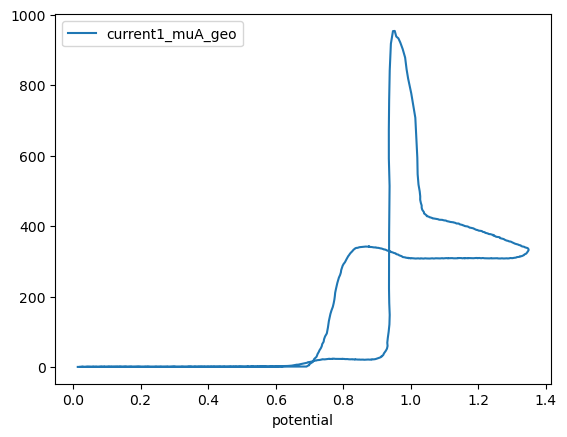

In [19]:
charges.charge_total_j['df'].plot('potential', 'current1_muA_geo')

In [20]:
pos_charge = charges.charge_total_j_pos['total charge']
pos_charge

3729.8639975513706

<Axes: xlabel='potential'>

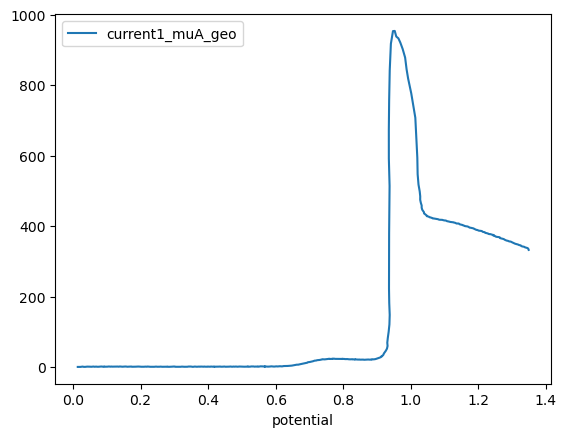

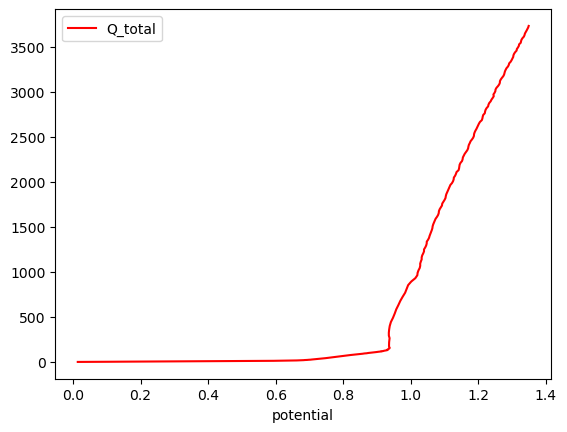

In [21]:
charges.charge_total_j_pos['df'].plot('potential', 'current1_muA_geo')
charges.charge_total_j_pos['df'].plot('potential', 'Q_total', color='r')

In [22]:
neg_charge = charges.charge_total_j_neg['total charge']
neg_charge

3842.1815806488366

<Axes: xlabel='potential'>

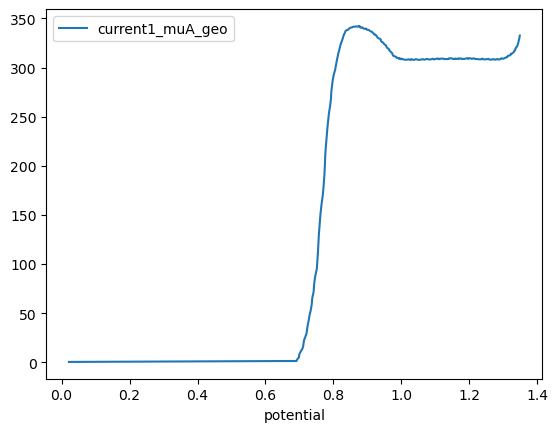

In [23]:
charges.charge_total_j_neg['df'].plot('potential', 'current1_muA_geo')

In [24]:
neg_charge + pos_charge - total_charge

2.7284841053187847e-12

no limits provided


<Axes: xlabel='potential'>

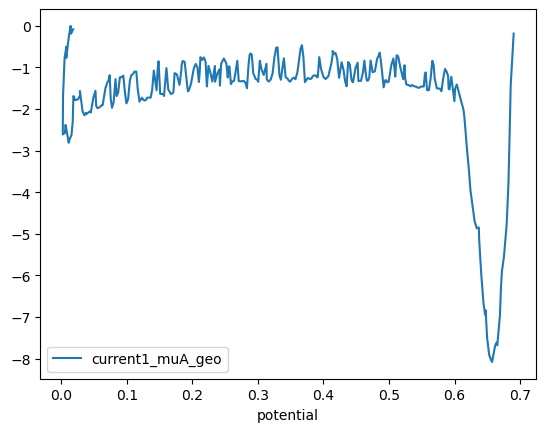

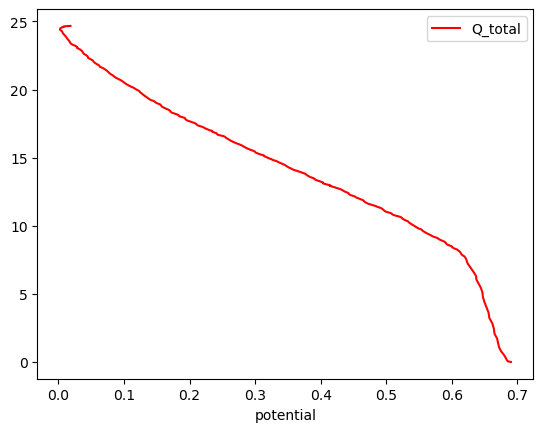

In [25]:
charges = COIntegral(timeshift.ts.df, K= timeshift.ts.K)
charges.charge_total_j_cathodic['df'].plot('potential', 'current1_muA_geo')
charges.charge_total_j_cathodic['df'].plot('potential', 'Q_total', color='r')

In [26]:
cathodic_charge = charges.charge_total_j_cathodic['total charge']
cathodic_charge

24.669750470927227

### charge masses

Similarly one can determine the charges in the MSCV in the different regions.

<Axes: xlabel='potential'>

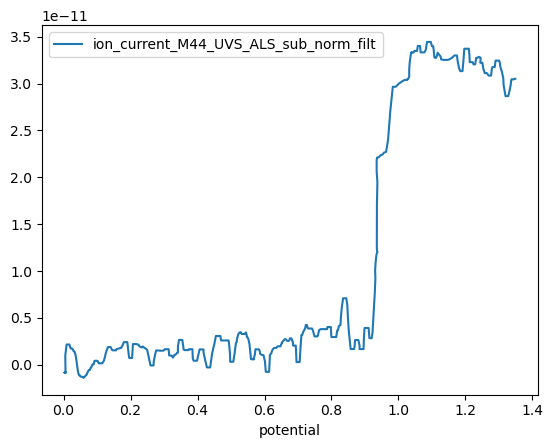

In [27]:
charges.charge_total_M_pos['df'].plot('potential', 'ion_current_M44_UVS_ALS_sub_norm_filt')

In [28]:
charge_total_M = charges.charge_total_M['total charge']
charge_total_M

7513.1022342067645

In [29]:
total_charge - charge_total_M

58.94334399344007

In [30]:
charge_total_M_pos = charges.charge_total_M_pos['total charge']
charge_total_M_pos

3378.3596020066525

In [31]:
pos_charge - charge_total_M_pos

351.50439554471814

In [32]:
charge_total_M_neg = charges.charge_total_M_neg['total charge']
charge_total_M_neg

4134.7426322001165

In [33]:
neg_charge - charge_total_M_neg

-292.5610515512799

### Summary

In [34]:
# charges = COIntegral(timeshift.ts.df, K=timeshift.ts.K)
charges.summary()

{'Q_tot_j': 7572.045578200205,
 'Q_tot_M': 7513.1022342067645,
 'Q_tot_j - Q_tot_M': 58.94334399344007,
 'Q_tot_j_pos': 3729.8639975513706,
 'Q_tot_M_pos': 3378.3596020066525,
 'Q_diff_pos = Q_tot_j_pos - Q_tot_M_pos': 351.50439554471814,
 'Q_tot_j_neg': 3842.1815806488366,
 'Q_tot_M_neg': 4134.7426322001165,
 'Q_diff_neg = Q_tot_j_neg - Q_tot_M_neg': -292.5610515512799,
 'Q_diff_neg - Q cathodic': -317.2308020222071,
 'Q cathodic': 24.669750470927227,
 'Q_diff_pos - Q_diff_neg': 58.94334399343825,
 'vertex potential': 1.3488129999999998,
 'Q_tot_j_sim_pos': 350.9043323878446,
 'Q_tot_j_sim_neg': 581.0839191494113,
 'Q_tot_j_sim_neg + cathodic': 605.7536696203385}

In [35]:
charges.summary(round_values=True) #  For nicer representation

{'Q_tot_j': 7572.0,
 'Q_tot_M': 7513.1,
 'Q_tot_j - Q_tot_M': 58.9,
 'Q_tot_j_pos': 3729.9,
 'Q_tot_M_pos': 3378.4,
 'Q_diff_pos = Q_tot_j_pos - Q_tot_M_pos': 351.5,
 'Q_tot_j_neg': 3842.2,
 'Q_tot_M_neg': 4134.7,
 'Q_diff_neg = Q_tot_j_neg - Q_tot_M_neg': -292.6,
 'Q_diff_neg - Q cathodic': -317.2,
 'Q cathodic': 24.7,
 'Q_diff_pos - Q_diff_neg': 58.9,
 'vertex potential': 1.3,
 'Q_tot_j_sim_pos': 350.9,
 'Q_tot_j_sim_neg': 581.1,
 'Q_tot_j_sim_neg + cathodic': 605.8}

From the charges object we can also simply plot again the different regions that were integrated.

<Axes: xlabel='potential'>

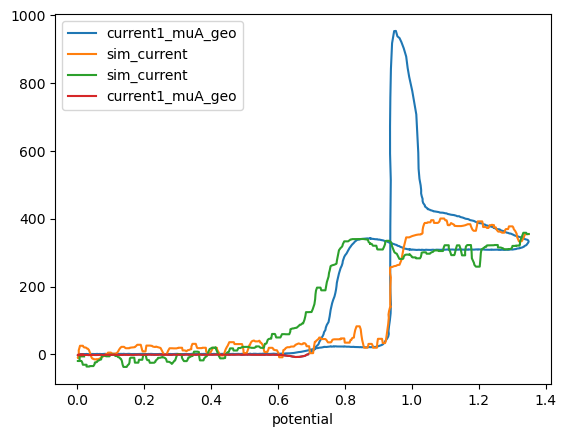

In [36]:
fig, ax = plt.subplots(1,1)
charges.charge_total_M['df'].plot('potential', 'current1_muA_geo', ax=ax)
charges.charge_total_M_pos['df'].plot('potential', 'sim_current', ax=ax)
charges.charge_total_M_neg['df'].plot('potential', 'sim_current', ax=ax)
charges.charge_total_j_cathodic['df'].plot('potential', 'current1_muA_geo', ax=ax)

## Single file summary

A short summary of the different objects introduced above

In [37]:
from iokectools.workingfiles import WorkingFiles
from iokectools.baseline import Baseline
from iokectools.timeshift import Timeshift
from iokectools.integrate import COIntegral
import matplotlib.pyplot as plt

In [38]:
file = [ '20190328_DEMS_CV_STMV-330-ML_Ru0001_B_H2SO4_DEMS_COox001_pn_c_119.csv',
        # '20190319_DEMS_CV_STMV-100-ML_Ru0001_E_H2SO4_DEMS_COox004_pn_c_120.csv',
       ]

datafolder = r'..\data'
wf = WorkingFiles(datafolder,file)
df = wf.create_concat_df()

Show a plot of the imported data.

<Axes: xlabel='potential'>

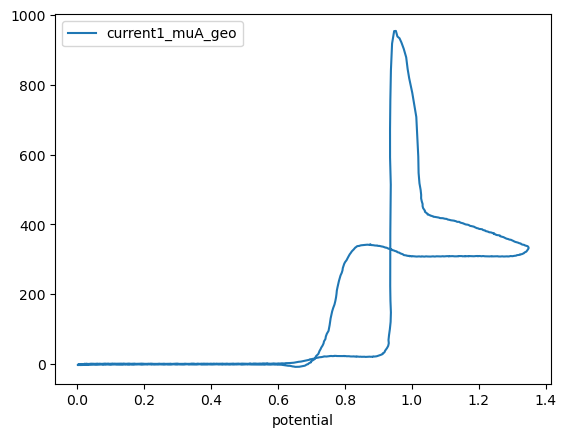

In [39]:
wf.plot()

In [40]:
baseline = Baseline(df)

In [41]:
K_prefactor=0.86
K_power = 1E-7
K = K_prefactor * K_power
timeshift = Timeshift(baseline.df, K_prefactor=K_prefactor, K_power=K_power, interval=-0.6)

In [42]:
#charges = COIntegral(timeshift.ts.df, K= timeshift.ts.K)
charges = COIntegral(timeshift.df, K= timeshift.K)

In [43]:
charges.summary(round_values=True)

no limits provided


{'Q_tot_j': 7566.2,
 'Q_tot_M': 7518.6,
 'Q_tot_j - Q_tot_M': 47.6,
 'Q_tot_j_pos': 3724.1,
 'Q_tot_M_pos': 3344.0,
 'Q_diff_pos = Q_tot_j_pos - Q_tot_M_pos': 380.1,
 'Q_tot_j_neg': 3842.1,
 'Q_tot_M_neg': 4174.5,
 'Q_diff_neg = Q_tot_j_neg - Q_tot_M_neg': -332.5,
 'Q_diff_neg - Q cathodic': -357.2,
 'Q cathodic': 24.7,
 'Q_diff_pos - Q_diff_neg': 47.6,
 'vertex potential': 1.3,
 'Q_tot_j_sim_pos': 379.9,
 'Q_tot_j_sim_neg': 618.6,
 'Q_tot_j_sim_neg + cathodic': 643.3}

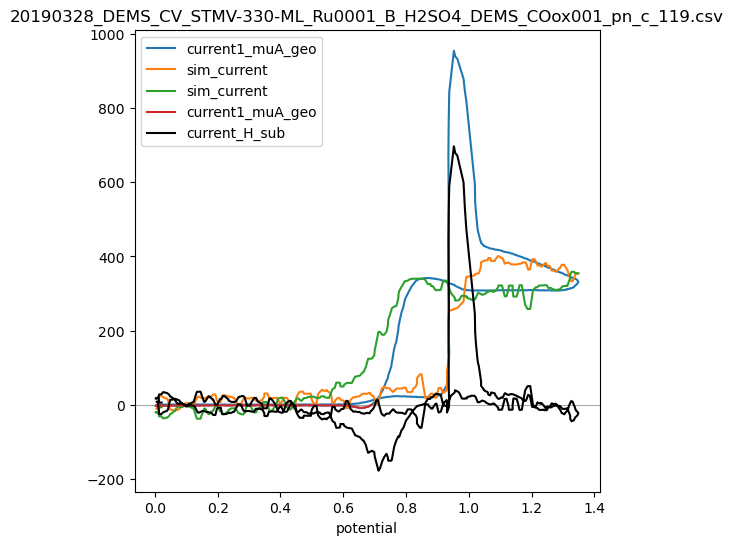

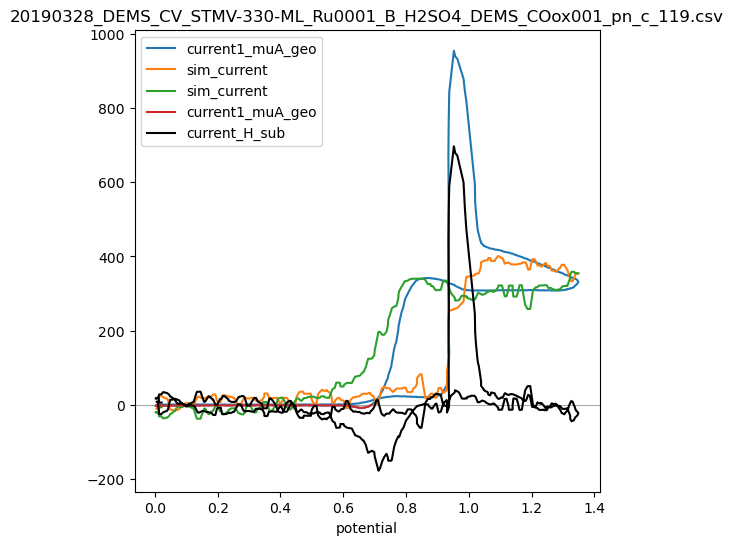

In [44]:
charges.plot(title=file[0])